<a href="https://colab.research.google.com/github/piyushkchaudhari/CAPSTONE-PROJECT-REGRESSION-Bike-Share-Demand-Prediction-/blob/main/CAPSTONE_PROJECT_REGRESSION(Yes_Bank_Stock_Closing_Price_Prediction_).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **`YES BANK STOCK CLOSING PRICE PREDICTION `**

## Project Type - Regression

## Contribution - Individual

## **Project Summary -**

## There are only 185 columns and 5 rows in this dataset. The output variable (close) is right i decide to use transformation to make normal i use log10 transformation on output veriable .So i am converting the date column into two columns first one for month and second one for year.Then i check the correlation of all feature with each other.Then remove the columns having higher vif and lower correlation with the target column Close.But in our dataset only 5 columns and 3 columns are showing high variencel.To drop those column i create new column i use average value of those columns.

## **GitHub Link:** 
https://github.com/piyushkchaudhari/CAPSTONE-PROJECT-REGRESSION-Yes-Bank-Stock-Closing-Price-Prediction-

## **Problem Statement**

### Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month

## **Importing the libraries**

In [ ]:
# IMPORTIGN LIBRARY
import numpy as np
import pandas as pd
from numpy import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.svm import SVR
from scipy.stats import kde

## **Dataset Loading**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path='/content/drive/MyDrive/Almabetter/Machine Learning /data_YesBank_StockPrices.csv'
df=pd.read_csv(path)

## **Dataset First View**

In [ ]:
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [ ]:
df.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


## **Dataset Rows & Columns count**

In [ ]:
df.shape

(185, 5)

## **Dataset Information**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


## **About dataset:**
This dataset contain information about yes bank stock price . This dataset contain 185 rows and 5 columns. 


## **Duplicate Values**

In [ ]:

df.duplicated().sum()

0

No duplicate values ​​are present in this dataset

## **Missing Values/Null Values**

In [ ]:
df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

<Axes: >

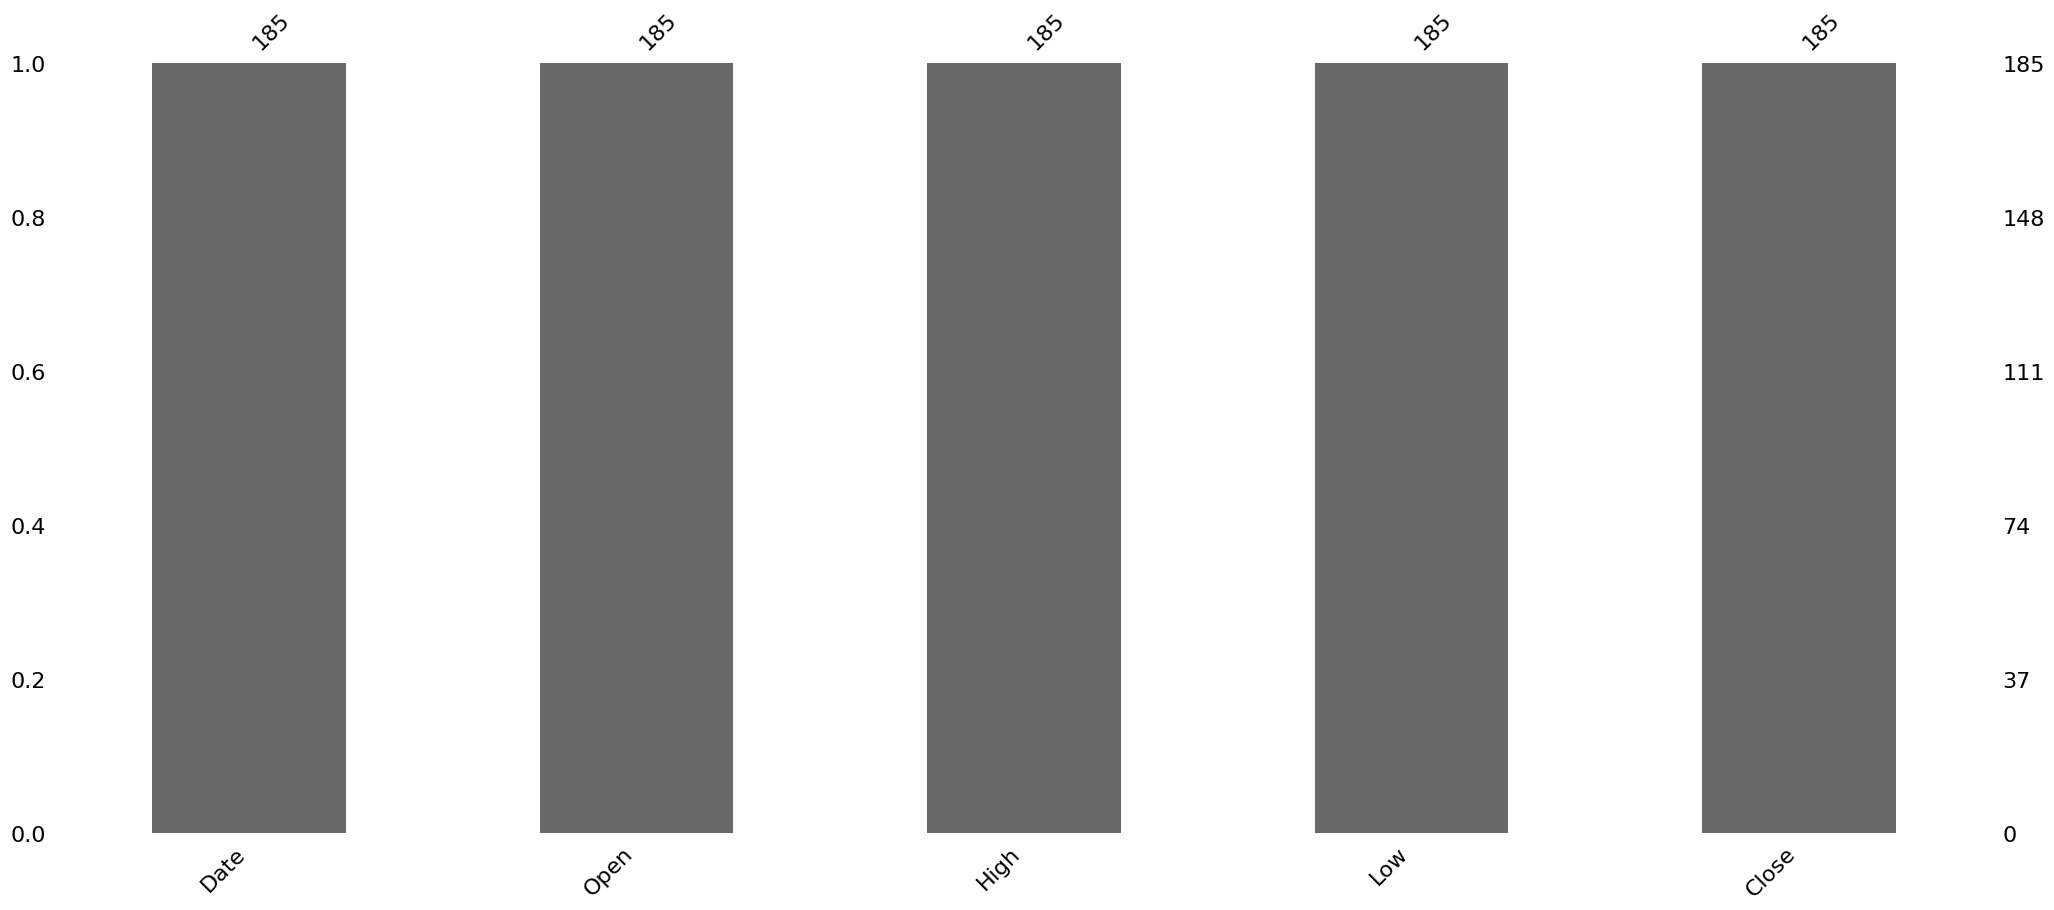

In [ ]:
msno.bar(df)

In [ ]:
numfeature=df.describe().columns

In [ ]:
df.describe(include='all')

,Date,Open,High,Low,Close
count,185,185.000000,185.000000,185.000000,185.000000
unique,185,NaN,NaN,NaN,NaN
top,Jul-05,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,105.541405,116.104324,94.947838,105.204703
std,NaN,98.879850,106.333497,91.219415,98.583153
min,NaN,10.000000,11.240000,5.550000,9.980000
25%,NaN,33.800000,36.140000,28.510000,33.450000
50%,NaN,62.980000,72.550000,58.000000,62.540000
75%,NaN,153.000000,169.190000,138.350000,153.300000


## **Understanding Your Variables**

## Date : Date of record 

## Open : opening price

## High: Highest price in the day 

## Low : Lowest price in the day

## Close : Ocupation of the speaker 

## **Check Unique Values for each variable.**

In [ ]:
df.nunique(dropna = True).sort_values(ascending=False)

Date     185
Close    185
High     184
Open     183
Low      183
dtype: int64

## **Feature Engineering**

In [ ]:
def yearconvert(x):
    return('20'+x[4:])

In [ ]:
df['Year']=df['Date'].apply(yearconvert)

In [ ]:
df.head()

,Date,Open,High,Low,Close,Year
0,Jul-05,13.00,14.00,11.25,12.46,2005
1,Aug-05,12.58,14.88,12.55,13.42,2005
2,Sep-05,13.48,14.87,12.27,13.30,2005
3,Oct-05,13.20,14.47,12.40,12.99,2005
4,Nov-05,13.35,13.88,12.88,13.41,2005


In [ ]:
def monthconvert(x):
  onth = {
          'Jan': 1,
          'Feb': 2,
          'Mar': 3,
          'Apr':4,
          'May':5,
          'Jun':6,
          'Jul':7,
          'Aug':8,
          'Sep':9,
          'Oct':10,
          'Nov':11,
          'Dec':12
          }
  a = x.strip()[:3]
  return(onth.get(a))

In [ ]:
df['Month']=df['Date'].apply(monthconvert)

In [ ]:
df.drop(['Date'],axis=1,inplace=True)

In [ ]:
df['Year']= df['Year'].astype(int)

In [ ]:
df['Mean'] = df[['Open', 'High', 'Low']].mean(axis=1).round(2)

In [ ]:
df.head()

,Open,High,Low,Close,Year,Month,Mean
0,13.00,14.00,11.25,12.46,2005,7,12.75
1,12.58,14.88,12.55,13.42,2005,8,13.34
2,13.48,14.87,12.27,13.30,2005,9,13.54
3,13.20,14.47,12.40,12.99,2005,10,13.36
4,13.35,13.88,12.88,13.41,2005,11,13.37


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    185 non-null    float64
 1   High    185 non-null    float64
 2   Low     185 non-null    float64
 3   Close   185 non-null    float64
 4   Year    185 non-null    int64  
 5   Month   185 non-null    int64  
 6   Mean    185 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 10.2 KB


# **Exploratory Data Analysis**

## **How much does our stock price fluctuate every year**

In [ ]:
yearf=df.groupby('Year').agg({'High':'max','Low':'min'})
yearf['percentage']=((yearf['High']-yearf['Low'])/yearf['Low'])*100

In [ ]:
yearf.drop(['High','Low'],axis=1,inplace=True)

<Figure size 1000x500 with 0 Axes>

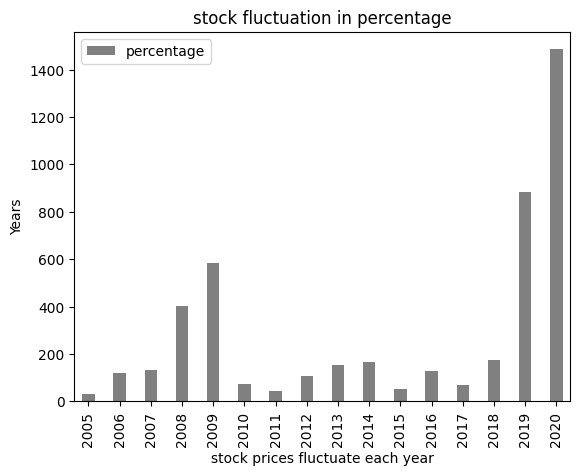

In [ ]:
fig = plt.figure(figsize = (10, 5))
 # creating the bar plot
yearf.plot.bar( color ='grey',
        width = 0.4)
plt.xlabel("stock prices fluctuate each year")
plt.ylabel("Years")
plt.title("stock fluctuation in percentage")
plt.show()

## **insights:**
## * Looks like our share price has seen the most volatility in 2020 and 2019
## *It seems that our share price has seen less volatility in 2005 and 2011

## **What is our stock price highest closing per year**

In [ ]:
highest=df.groupby('Year')['Close'].max()

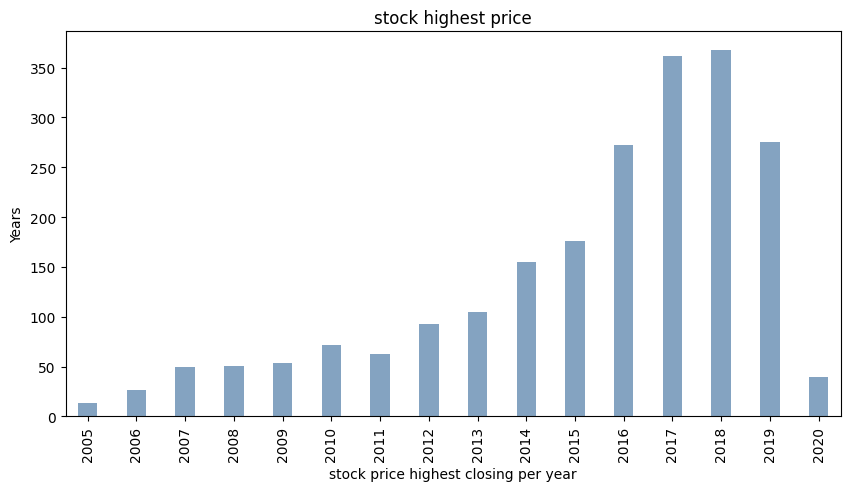

In [ ]:
fig = plt.figure(figsize = (10, 5))
 # creating the bar plot
highest.plot.bar( color =(0.2, 0.4, 0.6, 0.6),
        width = 0.4)
plt.xlabel("stock price highest closing per year")
plt.ylabel("Years")
plt.title("stock highest price")
plt.show()

## **insights:**
## * Looks like our share price has seen the highest closing price in 2017 and 2018
## * Looks like our share price increase till 2018
## * Looks like our stock price crashed near 2019 and 2020

## **What is the percentage increase in our stock price per year**

In [ ]:
increase=df[df['Month']==3]
increase['percentage_chage']=increase['Close'].pct_change()
increase.drop(['Open','High','Low','Close','Month','Mean'],axis=1,inplace=True)

<ipython-input-29-6a79a225f42f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  increase['percentage_chage']=increase['Close'].pct_change()
<ipython-input-29-6a79a225f42f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  increase.drop(['Open','High','Low','Close','Month','Mean'],axis=1,inplace=True)


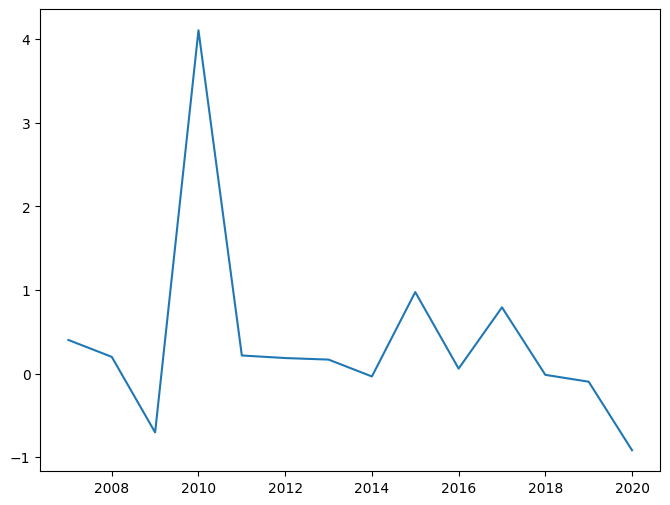

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(increase['Year'],increase['percentage_chage']);

## **insights:**
## * Looks like our share price has turned negative in 2019

<ipython-input-31-f35a354e3142>:4: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  sns.kdeplot(df['Close'], shade=True, bw=0.5, color="olive")
<ipython-input-31-f35a354e3142>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Close'], shade=True, bw=0.5, color="olive")


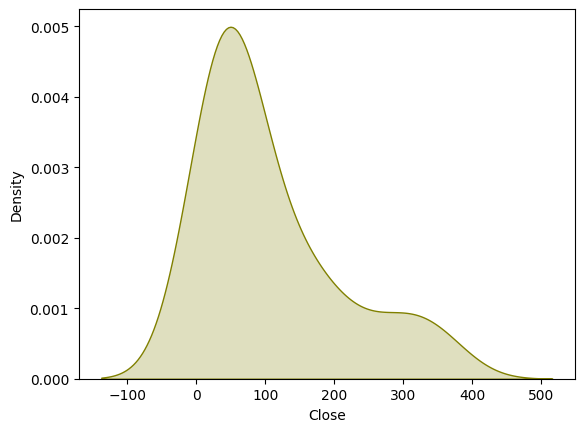

In [ ]:
s = sns.load_dataset('iris')

# Make default density plot
sns.kdeplot(df['Close'], shade=True, bw=0.5, color="olive")
plt.show()

<ipython-input-32-00e69d7652c6>:4: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  sns.kdeplot(np.log10(df['Close']), shade=True, bw=0.5, color="olive")
<ipython-input-32-00e69d7652c6>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(np.log10(df['Close']), shade=True, bw=0.5, color="olive")


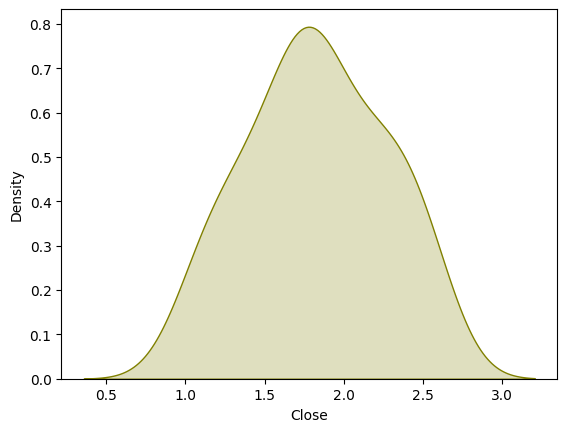

In [ ]:
s = sns.load_dataset('iris')

# Make default density plot
sns.kdeplot(np.log10(df['Close']), shade=True, bw=0.5, color="olive")
plt.show()

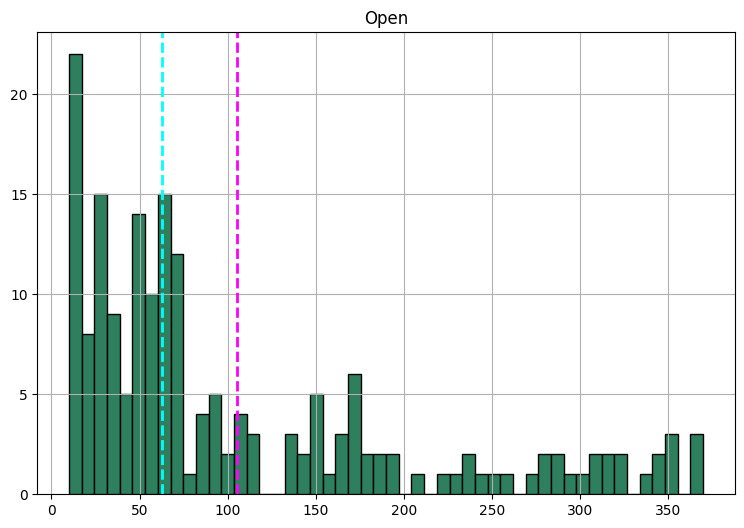

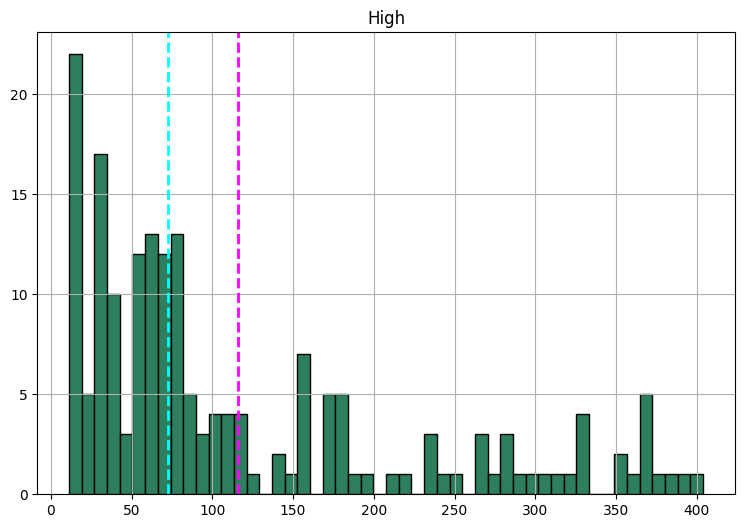

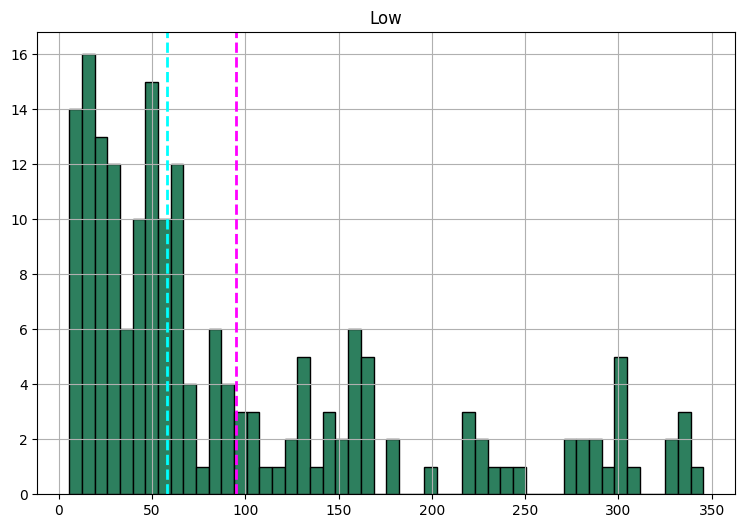

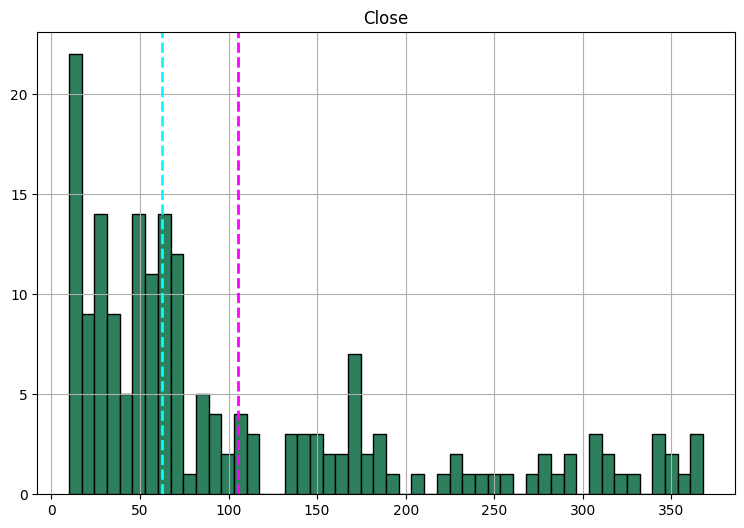

In [ ]:
for i in numfeature:

  fig = plt.figure(figsize=(9, 6))
  ax = fig.gca()
  feature = df[i]
  feature.hist(bins=50, ax = ax,edgecolor="black", color='#2d7f5e')
  ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
  ax.set_title(i)
plt.show()

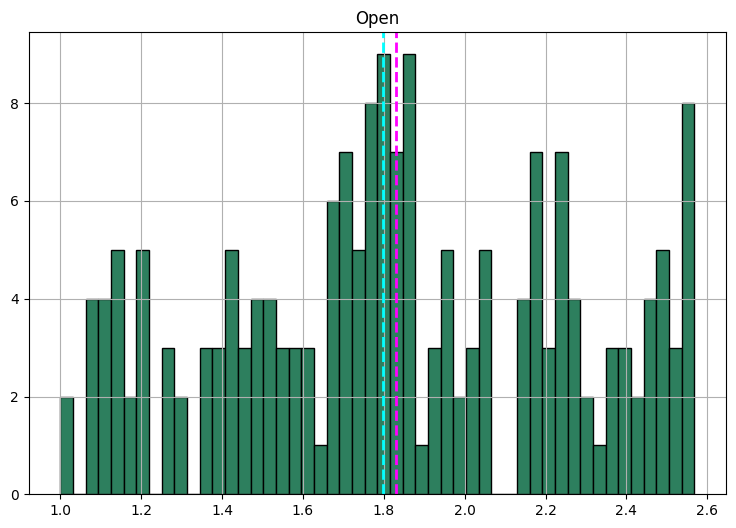

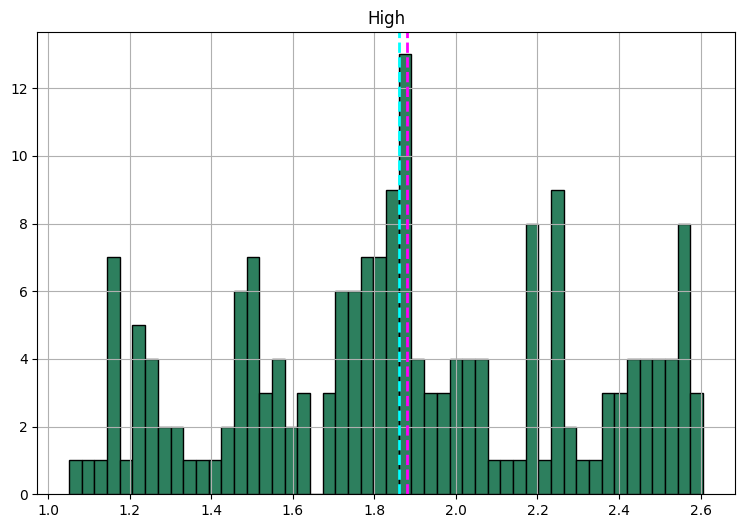

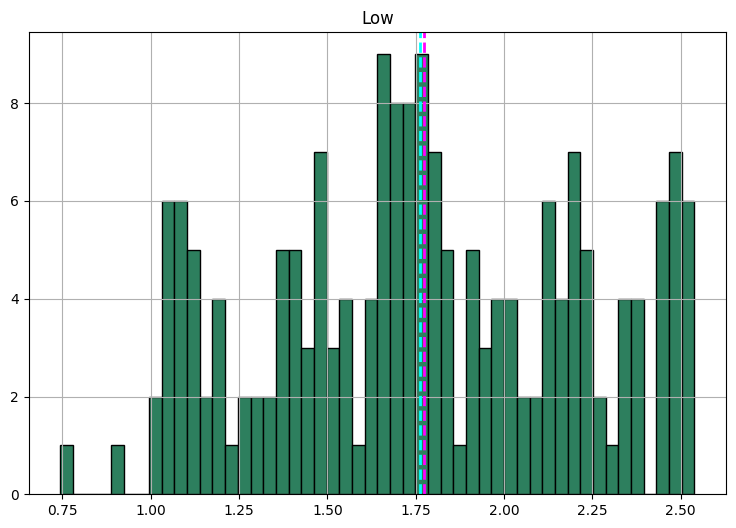

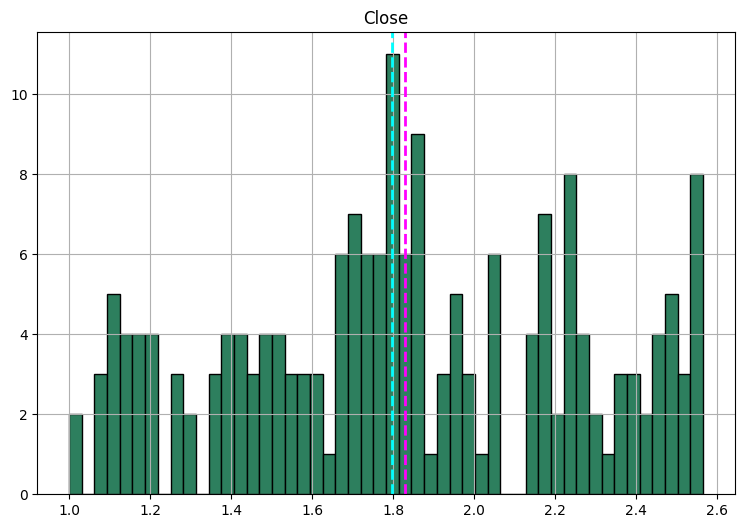

In [ ]:
for i in numfeature :
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = np.log10(df[i])
    feature.hist(bins=50, ax = ax,edgecolor="black", color='#2d7f5e')
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(i)
plt.show()

In [ ]:
ds=df.copy()
ds.drop(['Close'],axis=1,inplace=True)

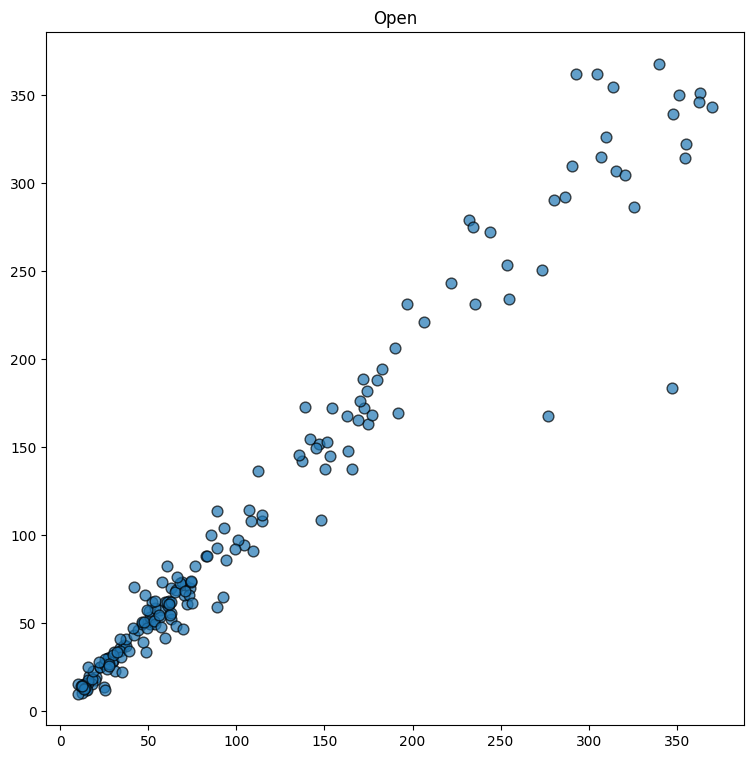

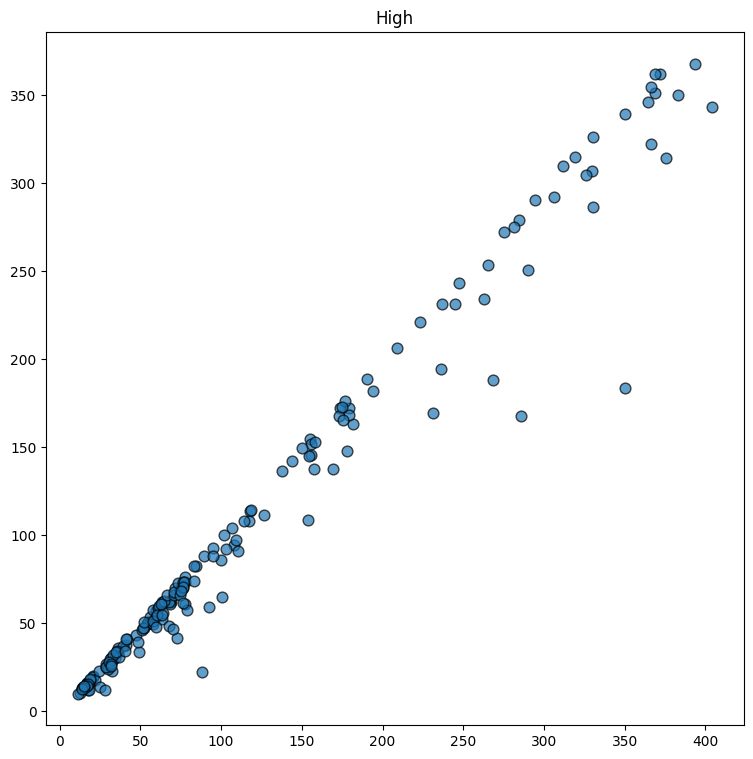

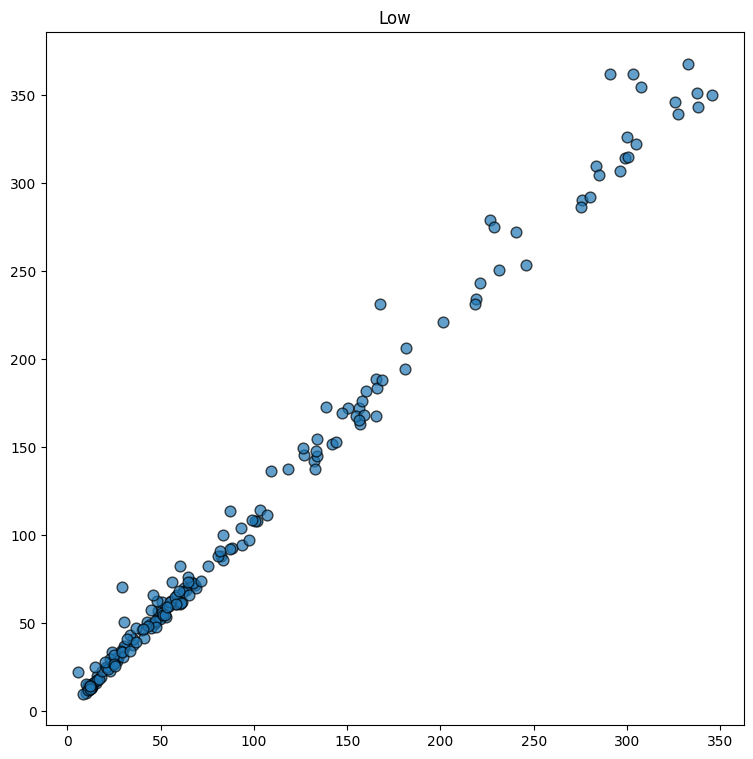

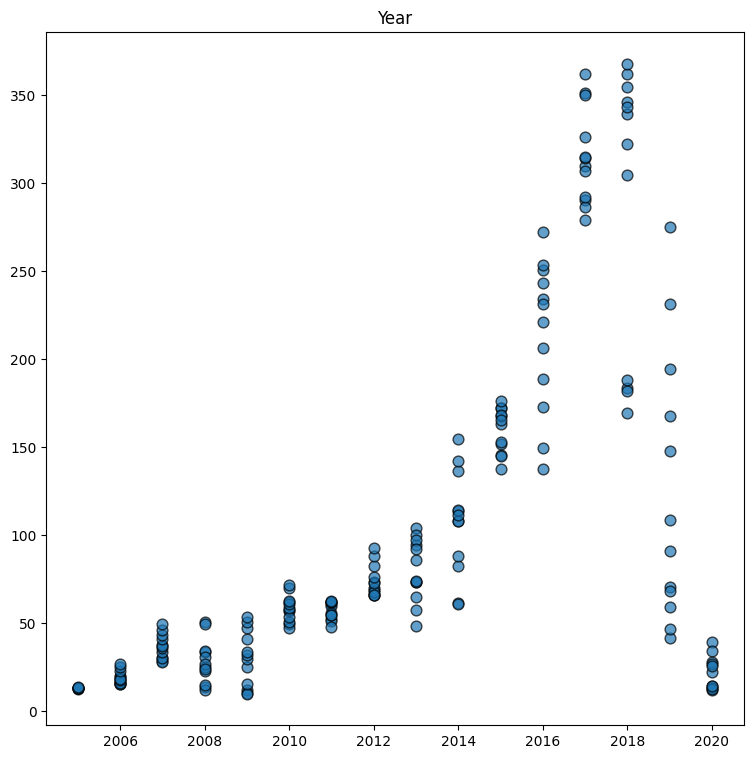

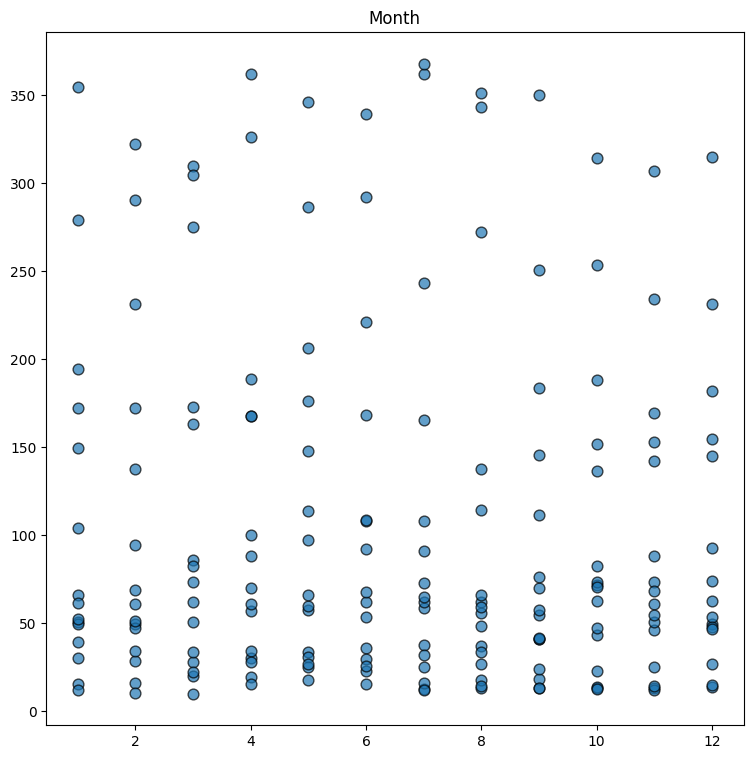

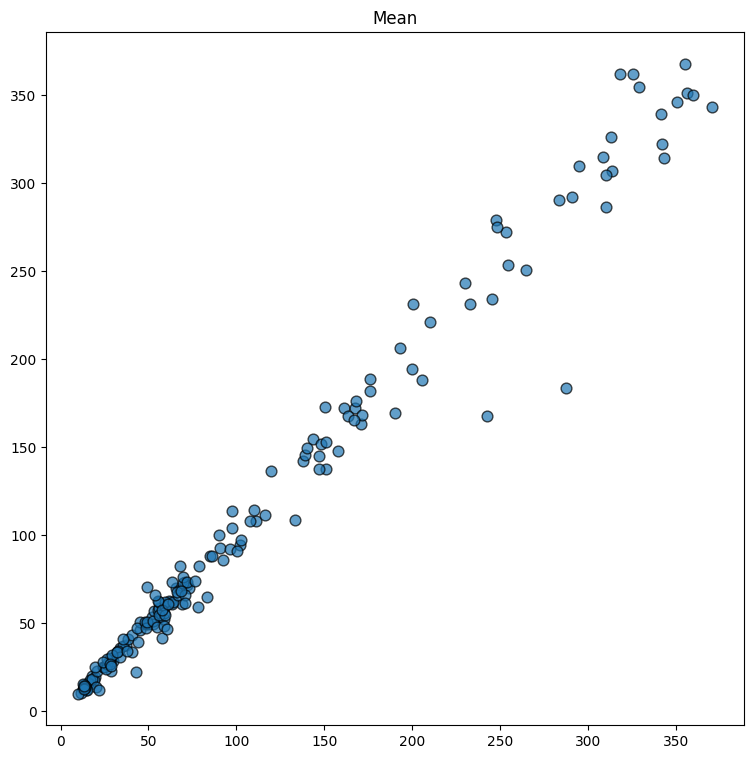

In [ ]:
for i in ds:
  x = df[i]
  y = df['Close']
  fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
  ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)

# Create sequence of 100 numbers from 0 to 100 
  xseq = np.linspace(0, 10, num=100)

# Plot regression line
  ax.plot( color="k", lw=2.5)
  ax.set_title(i)
plt.show()


In [ ]:
correlation=df.corr()

<Axes: >

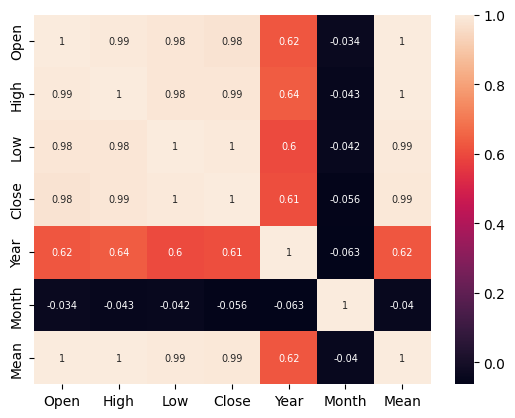

In [ ]:
sns.heatmap(correlation, annot=True, annot_kws={"size": 7})

## **Handling Multicollinearity**

In [ ]:
def calcvif(X):
  vif = pd.DataFrame()
  vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
  vif['variable'] = X.columns
  return(vif)

In [ ]:
df.head()

,Open,High,Low,Close,Year,Month,Mean
0,13.00,14.00,11.25,12.46,2005,7,12.75
1,12.58,14.88,12.55,13.42,2005,8,13.34
2,13.48,14.87,12.27,13.30,2005,9,13.54
3,13.20,14.47,12.40,12.99,2005,10,13.36
4,13.35,13.88,12.88,13.41,2005,11,13.37


In [ ]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Year', 'Month', 'Mean'], dtype='object')

In [ ]:
calcvif(df[[i for i in df if i not in ['Close','Open','High','Low']]])

,VIF,variable
0,5.994966,Year
1,4.657057,Month
2,2.167109,Mean


In [ ]:
ds.drop(['Open','High','Low'],axis=1,inplace=True)

In [ ]:
X = ds
Y = np.log10(df['Close'])

In [ ]:
X.head()

,Year,Month,Mean
0,2005,7,12.75
1,2005,8,13.34
2,2005,9,13.54
3,2005,10,13.36
4,2005,11,13.37


## **Model Implementation**

In [ ]:

X_train, X_test, Y_train, Y_test = train_test_split( X,Y, test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(148, 3)
(37, 3)


In [ ]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

## **Modelling:**
### These are the columns that i kept for modelling ['Year', 'Month', 'Mean'] and outcome veriable is ['Close']
### Ill be using LinearRegression,random forest,Lasso regression , Ridge regression, Elasticnet regression,Support Vector Regression. etc

## **Implementing Linear Regression**

In [ ]:
linearreg = LinearRegression()
linearreg.fit(X_train, Y_train)


LinearRegression()

In [ ]:
linearreg.score(X_train, Y_train)

0.8068438830263654

In [ ]:
Y_predlr=linearreg.predict(X_test)
print('R2 Score:- ', r2_score(10**(Y_test),10**(Y_predlr)))
print('RMSE:- ',math.sqrt(mean_squared_error(10**(Y_test),10**(Y_predlr))))

R2 Score:-  0.43983835740029975
RMSE:-  79.40481613816627


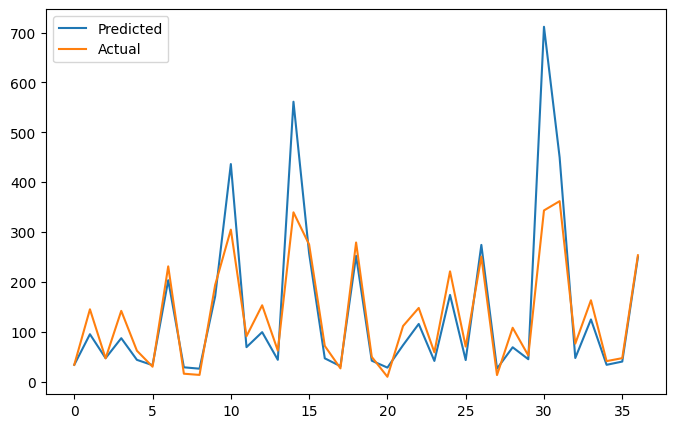

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(10**(Y_predlr))
plt.plot(10**(np.array(Y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

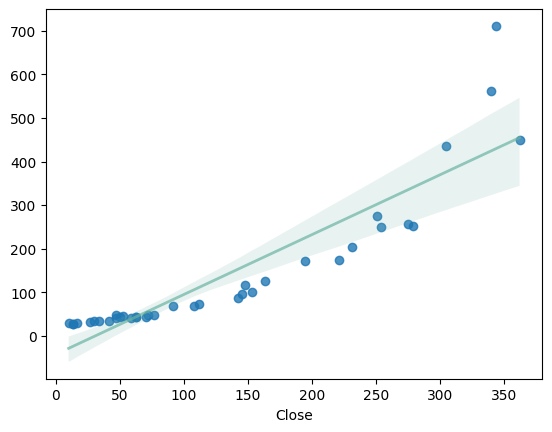

In [ ]:
sns.regplot(x=10**(Y_test), y=10**(Y_predlr), line_kws={"color":"#69b3a2","alpha":0.7,"lw":2})
plt.show()

## **HYPERPARAMETER TUNING**

In [ ]:
lasso = Lasso()
alphaslasso= {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, alphaslasso, cv=3)
lasso_regressor.fit(X_train, Y_train)

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]})

In [ ]:
print('best alpha :-', lasso_regressor.best_params_)

best alpha :- {'alpha': 0.01}


In [ ]:
ridge = Ridge()
alphasRidge= {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, alphasRidge, cv=3)
ridge_regressor.fit(X_train, Y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]})

In [ ]:
print('best alpha :-', ridge_regressor.best_params_)

best alpha :- {'alpha': 1}


In [ ]:
elastic = ElasticNet()
alphaselastic = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10],'l1_ratio':[0.3,0.4,0.5]}
elastic_regressor = GridSearchCV(elastic,alphaselastic, cv=3)
elastic_regressor.fit(X_train, Y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.995e-02, tolerance: 1.784e-03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.304e-01, tolerance: 1.784e-03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.300e-02, tolerance: 1.659e-03

GridSearchCV(cv=3, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10],
                         'l1_ratio': [0.3, 0.4, 0.5]})

In [ ]:
print('best alpha :-', elastic_regressor.best_params_)

best alpha :- {'alpha': 0.01, 'l1_ratio': 0.5}


In [ ]:
parameter_rf={
 'max_depth': [10, 20, 30],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600]}

In [ ]:
rf = RandomForestRegressor()
randomforest_regressor = GridSearchCV(rf,parameter_rf, cv=5)
randomforest_regressor.fit(X_train, Y_train)

KeyboardInterrupt: ignored

In [ ]:
print('best params :-',randomforest_regressor.best_params_)

## **Implementing Lasso Regression**

In [ ]:
lassoreg=Lasso(alpha=0.001,max_iter=1000)
lassoreg.fit(X_train, Y_train)

Lasso(alpha=0.001)

In [ ]:
lassoreg.score(X_train, Y_train)

0.8068320395120467

In [ ]:
Y_predlassor=lassoreg.predict(X_test)
print('R2 Score:- ', r2_score(10**(Y_test),10**(Y_predlassor)))
print('RMSE:- ',math.sqrt(mean_squared_error(10**(Y_test),10**(Y_predlassor))))

R2 Score:-  0.45126381306642804
RMSE:-  78.59084559343434


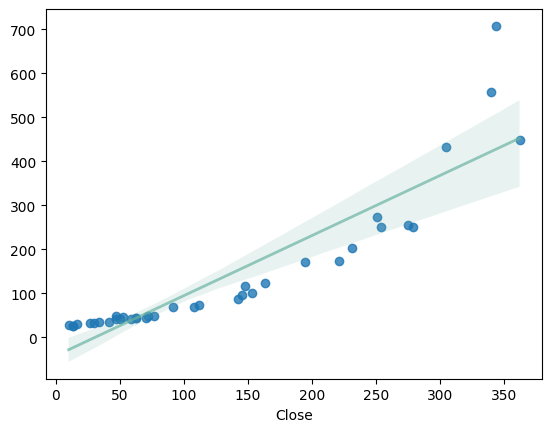

In [ ]:
sns.regplot(x=10**(Y_test), y=10**(Y_predlassor), line_kws={"color":"#69b3a2","alpha":0.7,"lw":2})
plt.show()

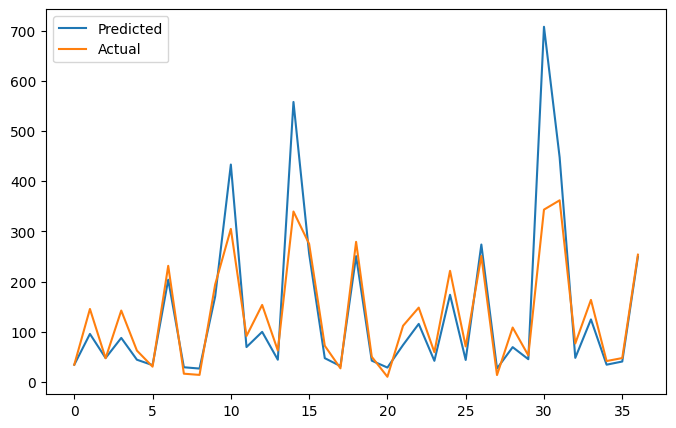

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(10**(Y_predlassor))
plt.plot(10**(np.array(Y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

## **Implementing Ridge Regression**

In [ ]:
ridgereg=Ridge(alpha=100)
ridgereg.fit(X_train, Y_train)

Ridge(alpha=100)

In [ ]:
ridgereg.score(X_train, Y_train)

0.6962830718307358

In [ ]:
Y_predridge=ridgereg.predict(X_test)
print('R2 Score:- ', r2_score(10**(Y_test),10**(Y_predridge)))
print('RMSE:- ',math.sqrt(mean_squared_error(10**(Y_test),10**(Y_predridge))))

R2 Score:-  0.6713780534985753
RMSE:-  60.81888345600759


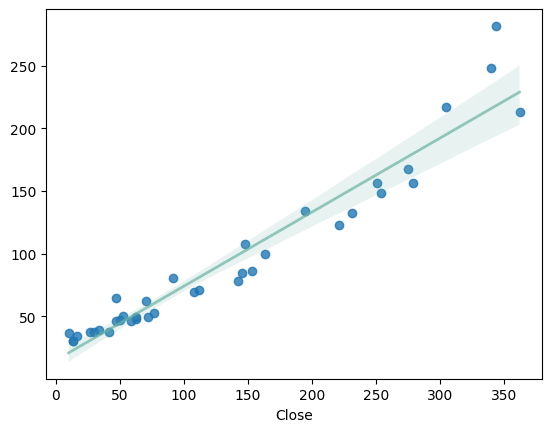

In [ ]:
sns.regplot(x=10**(Y_test), y=10**(Y_predridge), line_kws={"color":"#69b3a2","alpha":0.7,"lw":2})
plt.show()

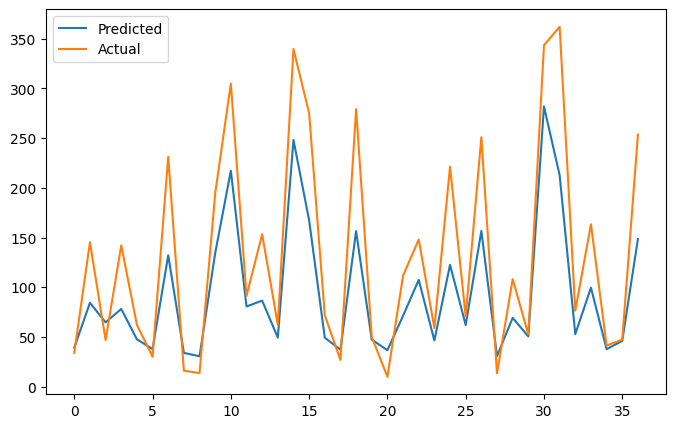

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(10**(Y_predridge))
plt.plot(10**(np.array(Y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

## **Implementing ElasticNet Regression**

In [ ]:
elasticreg=ElasticNet(alpha=0.01,l1_ratio=0.5)
elasticreg.fit(X_train, Y_train)

ElasticNet(alpha=0.01)

In [ ]:
elasticreg.score(X_train, Y_train)

0.8064515107237642

In [ ]:
Y_predelastic=elasticreg.predict(X_test)
print('R2 Score:- ', r2_score(10**(Y_test),10**(Y_predelastic)))
print('RMSE:- ',math.sqrt(mean_squared_error(10**(Y_test),10**(Y_predelastic))))

R2 Score:-  0.5184132714488371
RMSE:-  73.62535742187362


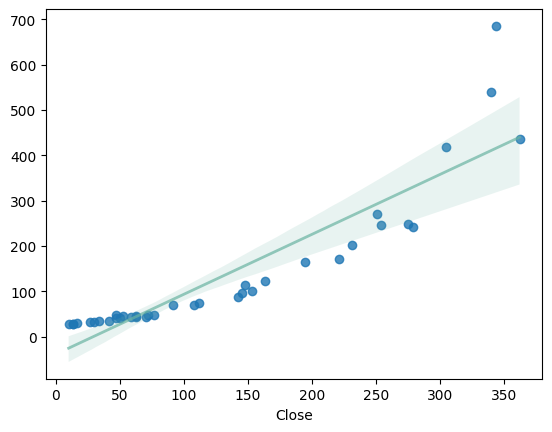

In [ ]:
sns.regplot(x=10**(Y_test), y=10**(Y_predelastic), line_kws={"color":"#69b3a2","alpha":0.7,"lw":2})
plt.show()

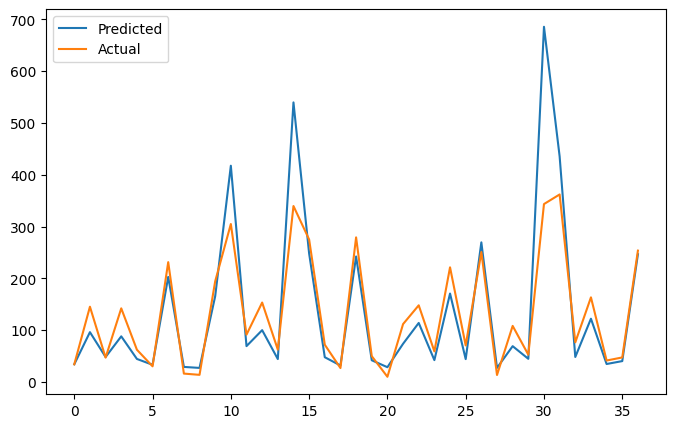

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(10**(Y_predelastic))
plt.plot(10**(np.array(Y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

## **Implementing Support Vector Regression**

In [ ]:
svrr= SVR(kernel = 'rbf')
svrr.fit(X_train, Y_train)

SVR()

In [ ]:
svrr.score(X_train, Y_train)

0.9648663644149003

In [ ]:
Y_predsvr=svrr.predict(X_test)
print('R2 Score:- ', r2_score(10**(Y_test),10**(Y_predsvr)))
print('RMSE:- ',math.sqrt(mean_squared_error(10**(Y_test),10**(Y_predsvr))))

R2 Score:-  0.9423027637219001
RMSE:-  25.484004106555158


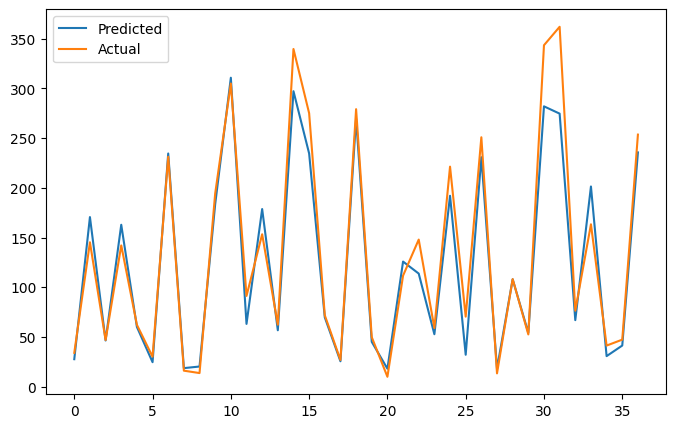

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(10**(Y_predsvr))
plt.plot(10**(np.array(Y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

## **Implementing RandomForest Regression**

In [ ]:
rfreg = RandomForestRegressor(max_depth=30, min_samples_leaf= 2, min_samples_split= 5, n_estimators=400)
rfreg.fit(X_train, Y_train)

RandomForestRegressor(max_depth=30, min_samples_leaf=2, min_samples_split=5,
                      n_estimators=400)

In [ ]:
rfreg.score(X_train, Y_train)

0.9924373244940277

In [ ]:
Y_predrf=rfreg.predict(X_test)
print('R2 Score:- ', r2_score(10**(Y_test),10**(Y_predrf)))
print('RMSE:- ',math.sqrt(mean_squared_error(10**(Y_test),10**(Y_predrf))))

R2 Score:-  0.9808813443113528
RMSE:-  14.669619085365152


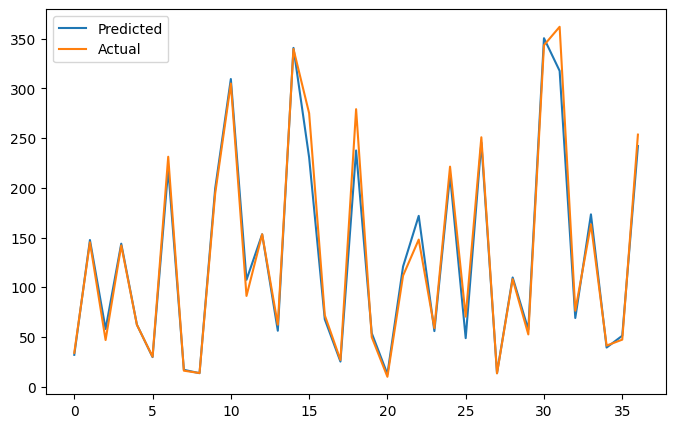

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(10**(Y_predrf))
plt.plot(10**(np.array(Y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

## **Feature Importances**

In [ ]:
importancesRandomForest = rfreg.feature_importances_

In [ ]:
importancesRandomForestdict={'features':list(X.columns),'features importances':importancesRandomForest}
importancesRandomForestdf=pd.DataFrame(importancesRandomForestdict)

<ipython-input-89-0c581c5558d3>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


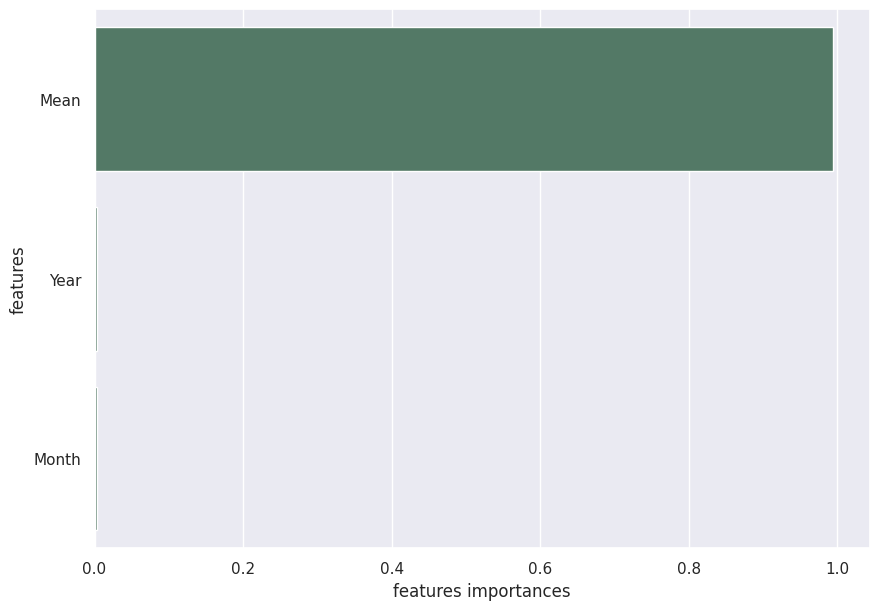

In [ ]:
# set plot style: grey grid in the background:
sns.set(style="darkgrid")

# load dataset
tips = importancesRandomForestdf.sort_values(['features importances'], ascending=False).reset_index(drop=True)

# Set the figure size
plt.figure(figsize=(10, 7))

# plot a bar chart
sns.barplot(
    x='features importances', 
    y='features', 
    data=tips, 
    estimator=sum, 
    ci=None, 
    color=(0.3,0.5,0.4,0.6));

## **conclusion**

In [ ]:
conclusion=pd.DataFrame({'model':['LinearRegression','ridge regression','Lasso regression ', 'Elasticnet regression', 'Random Forest regression','Support Vector Regression'],'Trainingscore':[0.8068438830263654,0.8068320395120467,0.6962830718307358,0.8064515107237642,0.9923225957336668,0.9648663644149003],'TestingScore':[0.43983835740029975,0.45126381306642804,0.6713780534985753,0.5184132714488371,0.9792231796771677,0.9423027637219001]}).set_index('model')

Text(0.5, 0, 'Model')

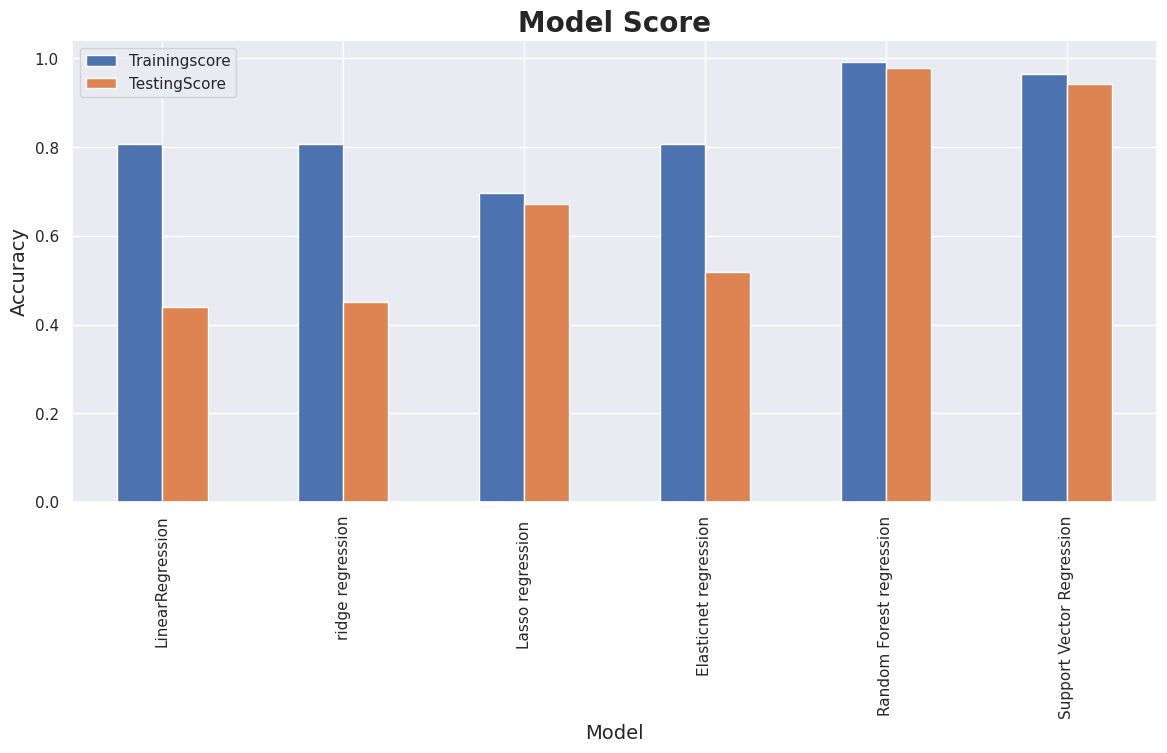

In [ ]:
conclusion.plot.bar(figsize=(14,6))
plt.title('Model Score',fontweight="bold", size=20)
plt.ylabel("Accuracy",size=14)
plt.xlabel("Model",size=14)

## **Model Final Conclusion**
### * From above its clear that Random Forest regression model is the best model for this dataset.
### * ridge regularization performed very poorly.
### * Support Vector model also gives better results compared to other models

## **EDA Final Conclusion**
## * share price has seen the most volatility in 2020 and 2019
## * share price has seen the highest closing price in 2017 and 2018
## *  share price increase till 2018
## *  stock price crashed near 2019 and 2020